In [ ]:
!pip install praw pandas nltk


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import praw
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime

# Your Reddit API credentials
CLIENT_ID = "GzXbc6Uqvzp-aVF0ZELpXw"
CLIENT_SECRET = "4NiCFrFiejZnKdwro7iYMvACVJ3Umw"
USER_AGENT = "epigamia_scraper by u/eaches"

# Initialize Reddit API client
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)


In [ ]:
def scrape_epigamia(limit=500):
    posts_data = []
    query = "Epigamia"
    for submission in reddit.subreddit("all").search(query, limit=limit, sort="new"):
        posts_data.append({
            "date": datetime.fromtimestamp(submission.created_utc),
            "title": submission.title,
            "text": submission.selftext,
            "score": submission.score,
            "num_comments": submission.num_comments,
            "url": submission.url
        })
    return pd.DataFrame(posts_data)

df = scrape_epigamia(limit=1000)
print(f"Fetched {len(df)} posts")
df.head()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 137 posts


,date,title,text,score,num_comments,url
0,2025-08-12 10:41:26,Grabbed a few definitely worth it at this price,,42,31,https://i.redd.it/80cmevt0ikif1.jpeg
1,2025-08-04 09:29:19,Ordered epigamia protein shake and....😐,"Wtf is this, swiggy wont even repay",13,9,https://i.redd.it/h2f96wau1zgf1.jpeg
2,2025-08-02 11:55:28,"What’s your Evening snacks, when you have less...",,1,17,https://www.reddit.com/gallery/1mfopts
3,2025-07-30 14:14:01,Where can I find shops selling epigamia turbo ...,I cannot find it on blinkit and Swiggy insta ...,2,3,https://www.reddit.com/r/kanpur/comments/1md7p...
4,2025-07-30 06:15:00,Why are today’s Bollywood actresses smarter ab...,I’ve been noticing many current Bollywood actr...,18,13,https://i.redd.it/uvwkxb6udyff1.png


In [ ]:
# STEP 5 — Fetch ALL posts from Jan 2020 to now

import pandas as pd
import datetime as dt
import time

def fetch_epigamia_posts_full():
    all_posts = []

    start_date = dt.date(2020, 1, 1)
    end_date = dt.date.today()

    # Loop through months
    current_date = start_date
    while current_date <= end_date:
        next_month = (current_date.replace(day=28) + dt.timedelta(days=4)).replace(day=1)
        after_ts = int(dt.datetime(current_date.year, current_date.month, 1).timestamp())
        before_ts = int(dt.datetime(next_month.year, next_month.month, 1).timestamp())

        print(f"Fetching posts from {current_date.strftime('%Y-%m')}...")

        for submission in reddit.subreddit("all").search(
            query="Epigamia",
            sort="new",
            limit=None,
            params={
                "syntax": "plain",
                "after": after_ts,
                "before": before_ts
            }
        ):
            all_posts.append({
                "title": submission.title,
                "score": submission.score,
                "id": submission.id,
                "url": submission.url,
                "num_comments": submission.num_comments,
                "created": dt.datetime.fromtimestamp(submission.created_utc),
                "body": submission.selftext
            })

        current_date = next_month
        time.sleep(2)  # avoid hitting rate limits

    # Convert to DataFrame and drop duplicates
    df = pd.DataFrame(all_posts)
    df.drop_duplicates(subset="id", inplace=True)
    df.reset_index(drop=True, inplace=True)

    print(f"✅ Total posts fetched: {len(df)}")
    return df


# RUN the function
df = fetch_epigamia_posts_full()

# Quick check
df.head()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-01...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-02...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-03...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-04...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-05...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-06...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-07...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-08...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-09...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-10...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-11...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2020-12...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-01...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-02...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-03...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-04...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-05...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-06...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-07...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-08...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-09...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-10...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-11...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2021-12...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-01...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-02...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-03...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-04...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-05...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-06...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-07...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-08...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-09...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-10...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-11...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2022-12...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-01...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-02...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-03...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-04...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-05...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-06...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-07...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-08...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-09...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-10...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-11...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2023-12...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-01...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-02...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-03...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-04...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-05...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-06...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-07...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-08...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-09...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-10...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-11...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2024-12...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2025-01...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2025-02...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2025-03...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2025-04...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2025-05...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2025-06...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2025-07...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from 2025-08...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Total posts fetched: 137


,title,score,id,url,num_comments,created,body
0,Grabbed a few definitely worth it at this price,44,1mo58wg,https://i.redd.it/80cmevt0ikif1.jpeg,31,2025-08-12 10:41:26,
1,Ordered epigamia protein shake and....😐,11,1mh8tjf,https://i.redd.it/h2f96wau1zgf1.jpeg,9,2025-08-04 09:29:19,"Wtf is this, swiggy wont even repay"
2,"What’s your Evening snacks, when you have less...",1,1mfopts,https://www.reddit.com/gallery/1mfopts,17,2025-08-02 11:55:28,
3,Where can I find shops selling epigamia turbo ...,2,1md7pfz,https://www.reddit.com/r/kanpur/comments/1md7p...,3,2025-07-30 14:14:01,I cannot find it on blinkit and Swiggy insta ...
4,Why are today’s Bollywood actresses smarter ab...,14,1mcz0ye,https://i.redd.it/uvwkxb6udyff1.png,13,2025-07-30 06:15:00,I’ve been noticing many current Bollywood actr...


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import praw
import pandas as pd
from datetime import datetime
import time

# --------- Reddit API credentials ---------
CLIENT_ID = "GzXbc6Uqvzp-aVF0ZELpXw"
CLIENT_SECRET = "4NiCFrFiejZnKdwro7iYMvACVJ3Umw"
USER_AGENT = "epigamia_scraper by u/eaches"

# Initialize Reddit client
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

# --------- Parameters ---------
subreddits_to_search = ["all", "indiafood", "IndianFood", "Food", "snackreviews", "recipes"]
keywords = ["Epigamia", "Epigamia yogurt", "Epigamia snack", "Epigamia flavored yogurt"]
limit_per_search = 200  # max posts per subreddit per keyword

# --------- Scraper ---------
def scrape_epigamia(subreddits, keywords, limit=200):
    posts_data = []
    for sub in subreddits:
        print(f"Searching subreddit: {sub}")
        subreddit = reddit.subreddit(sub)
        for keyword in keywords:
            print(f"  Keyword: {keyword}")
            try:
                for submission in subreddit.search(keyword, limit=limit, sort="new"):
                    # Collect submission
                    posts_data.append({
                        "date": datetime.fromtimestamp(submission.created_utc),
                        "type": "submission",
                        "subreddit": sub,
                        "title": submission.title,
                        "text": submission.selftext,
                        "score": submission.score,
                        "num_comments": submission.num_comments,
                        "url": submission.url
                    })

                    # Collect all comments
                    submission.comments.replace_more(limit=0)
                    for comment in submission.comments.list():
                        posts_data.append({
                            "date": datetime.fromtimestamp(comment.created_utc),
                            "type": "comment",
                            "subreddit": sub,
                            "title": None,
                            "text": comment.body,
                            "score": comment.score,
                            "num_comments": None,
                            "url": submission.url
                        })
            except Exception as e:
                print(f"Error in subreddit {sub} for keyword {keyword}: {e}")
            time.sleep(1)  # polite pause to avoid rate limits
    return pd.DataFrame(posts_data)

# --------- Run scraper ---------
df = scrape_epigamia(subreddits_to_search, keywords, limit=limit_per_search)
print(f"Fetched total {len(df)} entries")

# --------- Save CSV ---------
df.to_csv("epigamia_reddit_full.csv", index=False)
print("CSV saved successfully as 'epigamia_reddit_full.csv'")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching subreddit: all
  Keyword: Epigamia


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

  Keyword: Epigamia yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

  Keyword: Epigamia snack


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

  Keyword: Epigamia flavored yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Searching subreddit: indiafood
  Keyword: Epigamia


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia snack


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia flavored yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching subreddit: IndianFood
  Keyword: Epigamia


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia snack


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia flavored yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Searching subreddit: Food
  Keyword: Epigamia


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia snack


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia flavored yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Searching subreddit: snackreviews
  Keyword: Epigamia


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia snack


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia flavored yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching subreddit: recipes
  Keyword: Epigamia


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia snack


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  Keyword: Epigamia flavored yogurt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Fetched total 9029 entries
CSV saved successfully as 'epigamia_reddit_full.csv'


In [ ]:
!pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("epigamia_reddit_full.csv")

# Combine title and text for analysis
df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

print(f"Total entries: {len(df)}")
df.head()


Total entries: 9029


,date,type,subreddit,title,text,score,num_comments,url,content
0,2025-08-12 10:41:26,submission,all,Grabbed a few definitely worth it at this price,NaN,44,32.0,https://i.redd.it/80cmevt0ikif1.jpeg,Grabbed a few definitely worth it at this price
1,2025-08-12 10:47:11,comment,all,NaN,My favorite is the vanilla caramel! I’ll take ...,24,NaN,https://i.redd.it/80cmevt0ikif1.jpeg,My favorite is the vanilla caramel! I’ll take...
2,2025-08-12 14:07:44,comment,all,NaN,Yes I carry this when travelling. I like epiga...,5,NaN,https://i.redd.it/80cmevt0ikif1.jpeg,Yes I carry this when travelling. I like epig...
3,2025-08-12 10:58:41,comment,all,NaN,Website?,3,NaN,https://i.redd.it/80cmevt0ikif1.jpeg,Website?
4,2025-08-12 11:10:14,comment,all,NaN,not available at my location :(,6,NaN,https://i.redd.it/80cmevt0ikif1.jpeg,not available at my location :(


sentiment
Positive    4770
Neutral     2859
Negative    1400
Name: count, dtype: int64


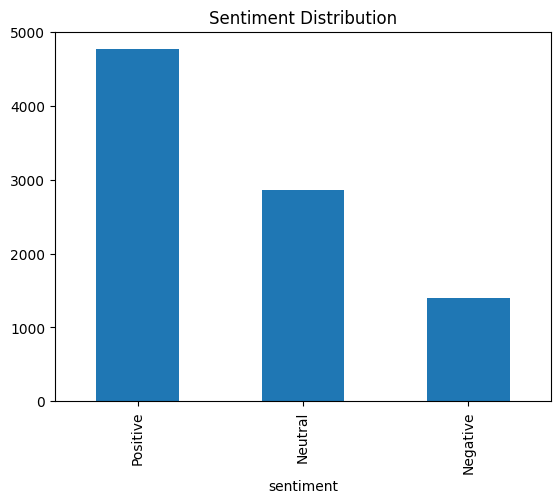

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['content'].apply(get_sentiment)

# Sentiment distribution
print(df['sentiment'].value_counts())
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment Distribution:
sentiment
Positive    4770
Neutral     2859
Negative    1400
Name: count, dtype: int64


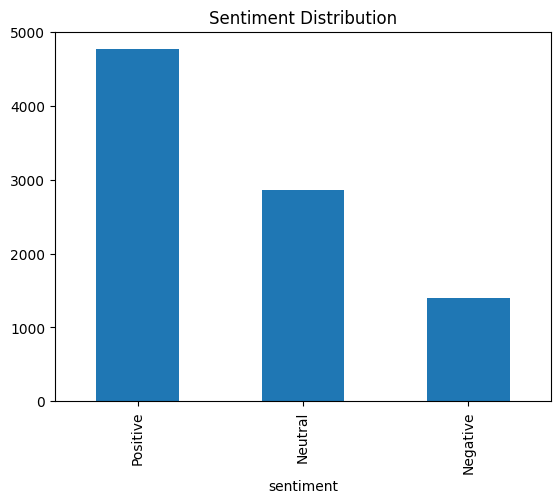

Top 20 descriptive words used by consumers:
[('good', 1108), ('healthy', 875), ('greek', 830), ('much', 560), ('high', 542), ('indian', 504), ('whole', 496), ('best', 479), ('fresh', 475), ('great', 449), ('ive', 443), ('different', 434), ('diet', 422), ('little', 411), ('garlic', 409), ('top', 363), ('small', 362), ('many', 357), ('cheese', 343), ('green', 333)]


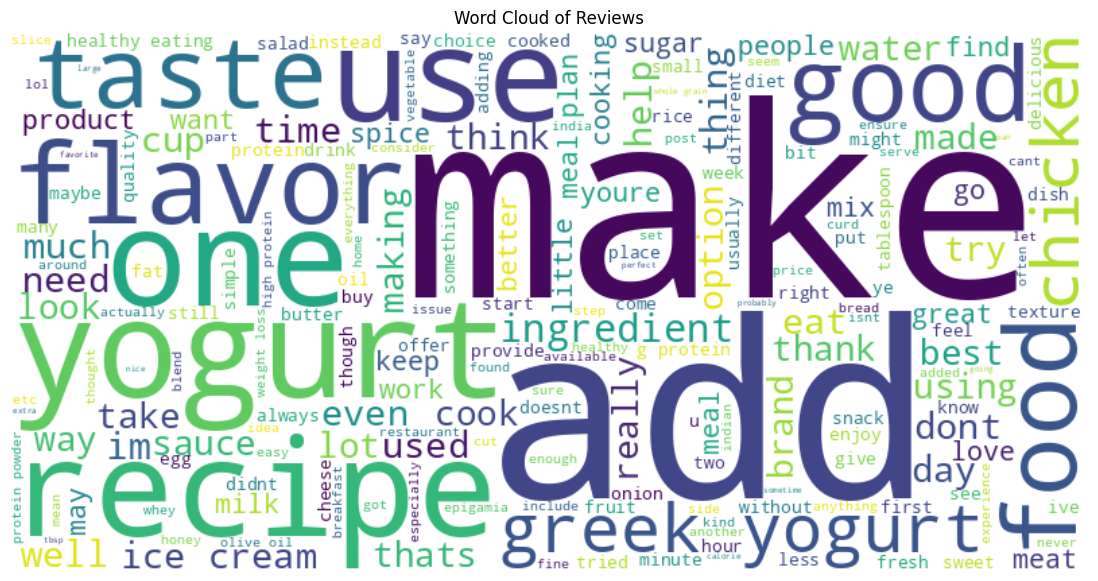

Top Positive Words: [('i', 1291), ('good', 1028), ('healthy', 854), ('greek', 574), ('more', 563), ('other', 562), ('best', 531), ('high', 457), ('whole', 454), ('fresh', 449), ('great', 429), ('indian', 413), ('much', 390), ('little', 349), ('different', 333)]
Top Negative Words: [('i', 320), ('greek', 148), ('bad', 106), ('other', 98), ('same', 93), ('more', 92), ('good', 87), ('much', 71), ('ive', 70), ('low', 67), ('different', 62), ('im', 50), ('sure', 48), ('indian', 48), ('high', 48)]


In [ ]:
# ------------------ Setup ------------------
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from wordcloud import WordCloud

# Download required NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# ------------------ Load Reviews CSV ------------------
df = pd.read_csv("epigamia_reddit_full.csv")

# Combine title and text for analysis
df['review_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

# ------------------ Sentiment Analysis ------------------
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['review_text'].apply(get_sentiment)

# Sentiment distribution
print("Sentiment Distribution:")
print(df['sentiment'].value_counts())
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()

# ------------------ Text Cleaning ------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove links
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    return text

df['clean_text'] = df['review_text'].apply(clean_text)

# ------------------ Top Descriptive Words ------------------
stop_words = set(stopwords.words('english'))
tokens = []

for review in df['clean_text']:
    words = word_tokenize(review)
    tokens.extend([w for w in words if w not in stop_words])

# POS tagging to extract adjectives
adjectives = [word for word, pos in pos_tag(tokens) if pos.startswith('JJ')]

# Count frequency
adj_counts = Counter(adjectives)
print("Top 20 descriptive words used by consumers:")
print(adj_counts.most_common(20))

# ------------------ Word Cloud ------------------
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

# ------------------ Positive vs Negative Words ------------------
positive_words = []
negative_words = []

for review, sentiment in zip(df['clean_text'], df['sentiment']):
    words = word_tokenize(review)
    adj = [w for w, pos in pos_tag(words) if pos.startswith('JJ')]
    if sentiment == 'Positive':
        positive_words.extend(adj)
    elif sentiment == 'Negative':
        negative_words.extend(adj)

print("Top Positive Words:", Counter(positive_words).most_common(15))
print("Top Negative Words:", Counter(negative_words).most_common(15))


In [ ]:
pip install scrapy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
import nltk

# Download the English POS tagger explicitly
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
!scrapy startproject ecommerce_reviews


New Scrapy project 'ecommerce_reviews', using template directory '/usr/local/lib/python3.12/dist-packages/scrapy/templates/project', created in:
    /content/ecommerce_reviews

You can start your first spider with:
    cd ecommerce_reviews
    scrapy genspider example example.com


In [ ]:
%cd ecommerce_reviews


/content/ecommerce_reviews


In [ ]:
from nltk import pos_tag, word_tokenize


In [ ]:
import nltk

# Download both standard and tabular punkt
nltk.download('punkt')
nltk.download('punkt_tab')  # ensures the missing resource is available


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize


In [ ]:
import asyncio
from scrapy.crawler import CrawlerProcess
from scrapy.utils.project import get_project_settings
from ecommerce_reviews.ecommerce_reviews.spiders.amazon_reviews import AmazonReviewsSpider

async def run_spider():
    process = CrawlerProcess(get_project_settings())
    process.crawl(AmazonReviewsSpider)
    process.start()

await run_spider()


ModuleNotFoundError: No module named 'ecommerce_reviews.ecommerce_reviews.spiders.amazon_reviews'

In [ ]:
import scrapy
from scrapy.crawler import CrawlerProcess
import nest_asyncio

nest_asyncio.apply()

class AmazonReviewsSpider(scrapy.Spider):
    name = "amazon_reviews"
    allowed_domains = ["amazon.in"]
    start_urls = [
        "https://www.amazon.in/s?k=epigamia+yogurt"  # Example search page
    ]

    def parse(self, response):
        for review in response.css("span.review-text-content span::text").getall():
            yield {"review": review.strip()}

process = CrawlerProcess(settings={
    "FEEDS": {"amazon_reviews.csv": {"format": "csv"}},
})

process.crawl(AmazonReviewsSpider)
process.start()


INFO:scrapy.utils.log:Scrapy 2.13.3 started (bot: scrapybot)
2025-08-20 07:51:06 [scrapy.utils.log] INFO: Scrapy 2.13.3 started (bot: scrapybot)
INFO:scrapy.utils.log:Versions:
{'lxml': '5.4.0',
 'libxml2': '2.13.8',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '25.5.0',
 'Python': '3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]',
 'pyOpenSSL': '24.2.1 (OpenSSL 3.3.2 3 Sep 2024)',
 'cryptography': '43.0.3',
 'Platform': 'Linux-6.1.123+-x86_64-with-glibc2.35'}
2025-08-20 07:51:06 [scrapy.utils.log] INFO: Versions:
{'lxml': '5.4.0',
 'libxml2': '2.13.8',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '25.5.0',
 'Python': '3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]',
 'pyOpenSSL': '24.2.1 (OpenSSL 3.3.2 3 Sep 2024)',
 'cryptography': '43.0.3',
 'Platform': 'Linux-6.1.123+-x86_64-with-glibc2.35'}
INFO:scrapy.addons:Enabled addons:
[]
2025-08-20 07:51:06 [scrapy.addons] INFO: Enabled addons:
[]
DEBUG:scrapy.utils.log:Usin

In [ ]:
import scrapy
from scrapy.crawler import CrawlerProcess
import nest_asyncio
nest_asyncio.apply()

class AmazonReviewsSpider(scrapy.Spider):
    name = "amazon_reviews"
    start_urls = ["https://www.amazon.in/product-reviews/B08PVZV3Z8/"]  # Epigamia Yogurt example

    def parse(self, response):
        for review in response.css("div[data-hook='review']"):
            yield {
                "platform": "Amazon",
                "review_text": review.css("span[data-hook='review-body'] span::text").get(default="").strip(),
                "rating": review.css("i[data-hook='review-star-rating'] span::text").get(default="").strip(),
            }
        next_page = response.css("li.a-last a::attr(href)").get()
        if next_page:
            yield response.follow(next_page, callback=self.parse)


In [ ]:
import scrapy

class BigBasketReviewsSpider(scrapy.Spider):
    name = "bigbasket_reviews"
    start_urls = ["https://www.bigbasket.com/pd/40033890/epigamia-greek-yogurt-strawberry-90-g-cup/"]

    def parse(self, response):
        for review in response.css("div.review-box"):
            yield {
                "platform": "BigBasket",
                "review_text": review.css("div.review-text::text").get(default="").strip(),
                "rating": review.css("span.star-rating::text").get(default="").strip(),
            }


In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

url = "https://www.bigbasket.com/pd/40033890/epigamia-greek-yogurt-strawberry-90-g-cup/"

# Setup Selenium
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # run in background
driver = webdriver.Chrome(options=options)
driver.get(url)
time.sleep(5)  # wait for JS to load

# Parse page
soup = BeautifulSoup(driver.page_source, "html.parser")
reviews = []
for r in soup.select("div.review-text"):  # BigBasket review container
    reviews.append({
        "platform": "BigBasket",
        "review_text": r.get_text(strip=True)
    })

driver.quit()

# Save CSV
df = pd.DataFrame(reviews)
df.to_csv("bigbasket_reviews.csv", index=False)
print(f"Saved {len(df)} reviews.")


ModuleNotFoundError: No module named 'selenium'

In [ ]:
!pip install selenium
!apt-get update
!apt-get install -y chromium-chromedriver
!pip install beautifulsoup4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 24.7 MB/s eta 0:00:00
Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,937 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,781 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu ja

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import time

# Set Chrome options
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Point to chromedriver via Service
service = Service('/usr/bin/chromedriver')  # path may vary in your system

# Initialize driver
driver = webdriver.Chrome(service=service, options=options)


DEBUG:selenium.webdriver.common.driver_finder:Skipping Selenium Manager; path to chrome driver specified in Service class: /usr/bin/chromedriver
2025-08-20 07:55:31 [selenium.webdriver.common.driver_finder] DEBUG: Skipping Selenium Manager; path to chrome driver specified in Service class: /usr/bin/chromedriver
DEBUG:selenium.webdriver.common.service:Started executable: `/usr/bin/chromedriver` in a child process with pid: 11574 using 0 to output -3
2025-08-20 07:55:31 [selenium.webdriver.common.service] DEBUG: Started executable: `/usr/bin/chromedriver` in a child process with pid: 11574 using 0 to output -3


WebDriverException: Message: Service /usr/bin/chromedriver unexpectedly exited. Status code was: 1


In [ ]:
!apt-get update
!apt-get install -y chromium-browser chromium-chromedriver
!pip install selenium beautifulsoup4


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")

# Path to the chromedriver installed by apt
service = Service("/usr/bin/chromedriver")

driver = webdriver.Chrome(service=service, options=chrome_options)


DEBUG:selenium.webdriver.common.driver_finder:Skipping Selenium Manager; path to chrome driver specified in Service class: /usr/bin/chromedriver
2025-08-20 07:56:22 [selenium.webdriver.common.driver_finder] DEBUG: Skipping Selenium Manager; path to chrome driver specified in Service class: /usr/bin/chromedriver
DEBUG:selenium.webdriver.common.service:Started executable: `/usr/bin/chromedriver` in a child process with pid: 12541 using 0 to output -3
2025-08-20 07:56:22 [selenium.webdriver.common.service] DEBUG: Started executable: `/usr/bin/chromedriver` in a child process with pid: 12541 using 0 to output -3


WebDriverException: Message: Service /usr/bin/chromedriver unexpectedly exited. Status code was: 1


In [ ]:
!apt-get update
!apt-get install -y chromium-browser chromium-chromedriver
!pip install selenium beautifulsoup4



Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [ ]:
!apt-get update
!apt-get install -y chromium-browser chromium-chromedriver
!pip install selenium beautifulsoup4

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

chrome_options = Options()
chrome_options.add_argument("--headless=new")  # works better in Colab
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
chrome_options.binary_location = "/usr/bin/chromium-browser"  # important

driver = webdriver.Chrome(options=chrome_options)

# Test
driver.get("https://www.bigbasket.com")
print(driver.title)  # Should print "BigBasket"

driver.quit()


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

DEBUG:selenium.webdriver.common.selenium_manager:Selenium Manager binary found at: /usr/local/lib/python3.12/dist-packages/selenium/webdriver/common/linux/selenium-manager
2025-08-20 07:58:17 [selenium.webdriver.common.selenium_manager] DEBUG: Selenium Manager binary found at: /usr/local/lib/python3.12/dist-packages/selenium/webdriver/common/linux/selenium-manager
DEBUG:selenium.webdriver.common.selenium_manager:Executing process: /usr/local/lib/python3.12/dist-packages/selenium/webdriver/common/linux/selenium-manager --browser chrome --browser-path /usr/bin/chromium-browser --language-binding python --output json
2025-08-20 07:58:17 [selenium.webdriver.common.selenium_manager] DEBUG: Executing process: /usr/local/lib/python3.12/dist-packages/selenium/webdriver/common/linux/selenium-manager --browser chrome --browser-path /usr/bin/chromium-browser --language-binding python --output json
DEBUG:selenium.webdriver.common.selenium_manager:Driver path: /root/.cache/selenium/chromedriver/lin

Access Denied


In [ ]:
import os
print(os.listdir())


['.config', 'ecommerce_reviews', 'amazon_reviews.csv', 'sample_data']


In [ ]:
pip install requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.amazon.in/product-reviews/B0769LRMKW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

reviews = soup.find_all('div', {'data-asin': True})

for review in reviews:
    title = review.find('a', {'data-asin-title': True})
    body = review.find('span', {'data-asin-body': True})
    if title and body:
        print(f"Title: {title.text.strip()}")
        print(f"Body: {body.text.strip()}")
        print("-" * 80)


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.amazon.in:443
2025-08-20 08:11:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.amazon.in:443
DEBUG:urllib3.connectionpool:https://www.amazon.in:443 "GET /product-reviews/B0769LRMKW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews HTTP/1.1" 404 873
2025-08-20 08:11:56 [urllib3.connectionpool] DEBUG: https://www.amazon.in:443 "GET /product-reviews/B0769LRMKW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews HTTP/1.1" 404 873


In [ ]:
import pandas as pd
from google.colab import files  # Only for Google Colab

# Upload the file
uploaded = files.upload()  # This will prompt you to select your CSV

# Get the filename
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

# Load into a DataFrame
df = pd.read_csv(filename)
print(f"Loaded {len(df)} rows.")
df.head()


Saving Amazon Review - Sheet1.csv to Amazon Review - Sheet1.csv
Uploaded file: Amazon Review - Sheet1.csv
Loaded 1126 rows.


,Product has good packaging and quality of material used. Taste good and has ample source of protein.
0,Good for digestion as well.
1,One person found this helpful
2,Helpful
3,Report
4,Sohit Singh Rajput


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Load your CSV
df = pd.read_csv("Amazon Review.csv")  # replace with your actual file name

# Combine relevant columns (adjust if your CSV has separate title/body)
df['review_text'] = df.apply(lambda x: ' '.join([str(x[col]) for col in df.columns if 'review' in col.lower()]), axis=1)

# Remove repetitive/irrelevant phrases
remove_phrases = ['1 person found this helpful', 'report', 'rating', 'stars', 'helpful']
pattern = '|'.join([re.escape(p) for p in remove_phrases])
df['review_text'] = df['review_text'].str.replace(pattern, '', flags=re.IGNORECASE)

# Basic text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

df['clean_text'] = df['review_text'].apply(clean_text)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'Amazon Review.csv'

In [ ]:
import os

# List all files in current directory
print(os.listdir())


['.config', 'ecommerce_reviews', 'amazon_reviews.csv', 'Amazon Review - Sheet1.csv', 'sample_data']


In [ ]:
import pandas as pd

# Load your uploaded file
df = pd.read_csv("Amazon Review - Sheet1.csv")
print(f"Loaded {len(df)} rows.")
df.head()


Loaded 1126 rows.


,Product has good packaging and quality of material used. Taste good and has ample source of protein.
0,Good for digestion as well.
1,One person found this helpful
2,Helpful
3,Report
4,Sohit Singh Rajput


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

# Combine relevant columns if needed (adjust if your CSV has separate title/body)
df['review_text'] = df.apply(lambda x: ' '.join([str(x[col]) for col in df.columns if 'review' in col.lower()]), axis=1)

# Remove repetitive phrases
remove_phrases = ['1 person found this helpful', 'report', 'rating', 'stars', 'helpful']
pattern = '|'.join([re.escape(p) for p in remove_phrases])
df['review_text'] = df['review_text'].str.replace(pattern, '', flags=re.IGNORECASE)

# Basic text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

df['clean_text'] = df['review_text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-08-20 08:35:34 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-08-20 08:35:34 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGener

Sentiment Counts:
 sentiment
Neutral    1126
Name: count, dtype: int64


2025-08-20 08:35:34 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
2025-08-20 08:35:34 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu 

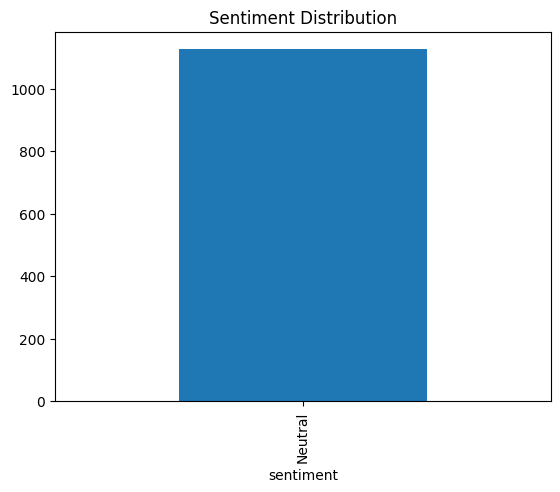

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Sentiment distribution
print("Sentiment Counts:\n", df['sentiment'].value_counts())
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()


In [ ]:
from nltk import pos_tag
from collections import Counter

stop_words = set(stopwords.words('english'))
tokens = []

for review in df['clean_text']:
    words = word_tokenize(review)
    tokens.extend([w for w in words if w not in stop_words])

# Extract adjectives
adjectives = [word for word, pos in pos_tag(tokens) if pos.startswith('JJ')]

# Top 20 adjectives
adj_counts = Counter(adjectives)
print("Top 20 descriptive words used by consumers:")
print(adj_counts.most_common(20))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk

# Force download the punkt tokenizer
nltk.download('punkt', quiet=True)

# Also ensure stopwords and tagger are available
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('vader_lexicon', quiet=True)

print("NLTK resources are ready.")


NLTK resources are ready.


In [ ]:
from nltk.tokenize import word_tokenize

# Example
sample_text = "This is a test review."
tokens = word_tokenize(sample_text)
print(tokens)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLTK downloads
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('vader_lexicon', quiet=True)

# Load your Amazon review CSV
df = pd.read_csv("Amazon Review - Sheet1.csv")

# Combine relevant columns into 'review_text'
df['review_text'] = df.apply(lambda x: ' '.join([str(x[col]) for col in df.columns if 'review' in col.lower()]), axis=1)

# Remove repetitive phrases
remove_phrases = ['1 person found this helpful', 'report', 'rating', 'stars', 'helpful']
pattern = '|'.join([re.escape(p) for p in remove_phrases])
df['review_text'] = df['review_text'].str.replace(pattern, '', flags=re.IGNORECASE)

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.str


In [ ]:
# ---------------- Positive vs Negative Adjectives ----------------
positive_words = []
negative_words = []

for review, sentiment in zip(df['clean_text'], df['sentiment']):
    words = tokenizer.tokenize(review)
    adj = [w for w, pos in pos_tag(words) if pos.startswith('JJ')]
    if sentiment == 'Positive':
        positive_words.extend(adj)
    elif sentiment == 'Negative':
        negative_words.extend(adj)

# Display top adjectives
from collections import Counter
print("Top Positive Words:", Counter(positive_words).most_common(15))
print("Top Negative Words:", Counter(negative_words).most_common(15))

# Optional: Word clouds for each
pos_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
neg_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

plt.figure(figsize=(15,7))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Adjectives Word Cloud")
plt.show()

plt.figure(figsize=(15,7))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Adjectives Word Cloud")
plt.show()


KeyError: 'clean_text'

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLTK downloads
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('vader_lexicon', quiet=True)

# ---------------- Load CSV ----------------
df = pd.read_csv("Amazon Review - Sheet1.csv")

# Combine all review columns (adjust if your column names are different)
df['review_text'] = df.apply(lambda x: ' '.join([str(x[col]) for col in df.columns if 'review' in col.lower()]), axis=1)

# Remove repetitive phrases
remove_phrases = ['1 person found this helpful', 'report', 'rating', 'stars', 'helpful']
pattern = '|'.join([re.escape(p) for p in remove_phrases])
df['review_text'] = df['review_text'].str.replace(pattern, '', flags=re.IGNORECASE)

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_text'] = df['review_text'].apply(clean_text)

# ---------------- Tokenizer & Sentiment ----------------
tokenizer = ToktokTokenizer()
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)

# ---------------- Positive vs Negative Adjectives ----------------
positive_words = []
negative_words = []

for review, sentiment in zip(df['clean_text'], df['sentiment']):
    words = tokenizer.tokenize(review)
    adj = [w for w, pos in pos_tag(words) if pos.startswith('JJ')]
    if sentiment == 'Positive':
        positive_words.extend(adj)
    elif sentiment == 'Negative':
        negative_words.extend(adj)

print("Top Positive Words:", Counter(positive_words).most_common(15))
print("Top Negative Words:", Counter(negative_words).most_common(15))


Top Positive Words: []
Top Negative Words: []


In [ ]:
positive_words = []
negative_words = []

for review, sentiment in zip(df['clean_text'], df['sentiment']):
    words = review.split()  # simple split
    if sentiment == 'Positive':
        positive_words.extend(words)
    elif sentiment == 'Negative':
        negative_words.extend(words)

print("Top Positive Words:", Counter(positive_words).most_common(15))
print("Top Negative Words:", Counter(negative_words).most_common(15))


Top Positive Words: []
Top Negative Words: []


In [ ]:
nltk.download('averaged_perceptron_tagger', quiet=True)


True

In [ ]:
import nltk

# Download necessary NLTK resources
nltk.download('punkt')  # tokenizer
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')  # try this first
nltk.download('averaged_perceptron_tagger_eng')  # fallback if above fails


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True